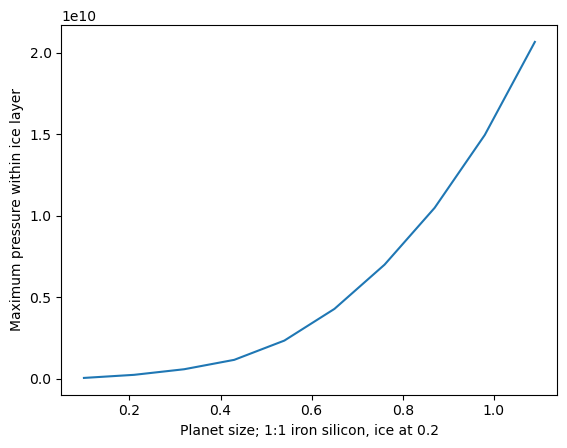

In [192]:
#Plots the maximum pressure in the ice vs. the iron/silicon ratio at a fixed ice thickness

%run ice_ball_dictionary.ipynb
%run looped_solver_2.ipynb

def plot_max_p_vs_ratio(up_to_rad, ice_thick):
    
    f = plt.figure()
        
    tuples_to_plot = []
    
    
    for earth_rad in np.arange(0.1, up_to_rad, up_to_rad/10):
        x = (1 - ice_thick) / 2
        fe = x
        si = x
            
        iron_silicon_ratio = fe / si
        
        iceball_profile_dictionary = ice_ball_dictionary(earth_rad, fe, si)
    
        radius = earth_rad * r_earth
        iceball_radii_list = [*range(1, int(radius), int(radius / 1000))]

        pressures = Solver(iceball_radii_list, iceball_profile_dictionary)[1]

        pressures_in_ice = []
    
        for p in pressures:
            r_index_of_p = pressures.index(p)
            r_for_p = iceball_radii_list[r_index_of_p]
            if r_for_p >= list(iceball_profile_dictionary.keys())[1]:
                pressures_in_ice.append(p)

        max_p = max(pressures_in_ice)
        tuples_to_add = (earth_rad, max_p)
        tuples_to_plot.append(tuples_to_add)


    x_val = [x[0] for x in tuples_to_plot]
    y_val = [x[1] for x in tuples_to_plot]

    
    plt.plot(x_val, y_val)
    
    plt.xlabel(f'Planet size; 1:1 iron silicon, ice at 0.2')
    plt.ylabel('Maximum pressure within ice layer')

    plt.show()

    f.savefig(f"max_ice_pressure_vs_planet_size_at_core_silicon_ratio_of_1_earthrad_{earth_rad-0.1}.pdf", bbox_inches='tight')


plot_max_p_vs_ratio(1.1, 0.2)